In [2]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [4]:
epoch = 100
lr = 1e-1
batch_size = 512
initializer = initializers.he_normal(seed=114)

In [5]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = math.sqrt(0.5)
    epochs_drop = 5
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [6]:
lrate = callbacks.LearningRateScheduler(step_decay)

In [7]:
def basic_layer(node, dropoutrate = 0):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    if(dropoutrate>0):
        layer.add(layers.Dropout(dropoutrate))
    layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [8]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(basic_layer(128, 0.125))
model.add(basic_layer(128, 0.125))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               100992    
_________________________________________________________________
sequential_2 (Sequential)    (None, 128)               17024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               34048     
_________________________________________________________________
sequential_4 (Sequential)    (None, 256)               66816     
_________________________________________________________________
sequential_5 (Sequential)    (None, 512)               133632    
_________________________________________________________________
sequential_6 (Sequential)    (None, 512)               2

In [10]:
sgd = optimizers.SGD()
model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, 
                               callbacks=[lrate])

Epoch 1/100
118/118 [==============================] - 22s 188ms/step - loss: 1.2979 - accuracy: 0.5170 - val_loss: 1.2773 - val_accuracy: 0.6172
Epoch 2/100
118/118 [==============================] - 16s 136ms/step - loss: 0.9105 - accuracy: 0.6618 - val_loss: 0.8814 - val_accuracy: 0.6981
Epoch 3/100
118/118 [==============================] - 16s 133ms/step - loss: 0.8401 - accuracy: 0.6868 - val_loss: 0.8129 - val_accuracy: 0.7238
Epoch 4/100
118/118 [==============================] - 15s 131ms/step - loss: 0.7999 - accuracy: 0.6990 - val_loss: 0.7232 - val_accuracy: 0.7436
Epoch 5/100
118/118 [==============================] - 15s 126ms/step - loss: 0.7761 - accuracy: 0.7101 - val_loss: 0.7129 - val_accuracy: 0.7424
Epoch 6/100
118/118 [==============================] - 17s 140ms/step - loss: 0.7570 - accuracy: 0.7161 - val_loss: 0.6932 - val_accuracy: 0.7462
Epoch 7/100
118/118 [==============================] - 18s 151ms/step - loss: 0.7474 - accuracy: 0.7202 - val_loss: 0.6936 -

Epoch 57/100
118/118 [==============================] - 16s 132ms/step - loss: 0.6378 - accuracy: 0.7617 - val_loss: 0.6054 - val_accuracy: 0.7801
Epoch 58/100
118/118 [==============================] - 16s 132ms/step - loss: 0.6321 - accuracy: 0.7661 - val_loss: 0.5969 - val_accuracy: 0.7811
Epoch 59/100
118/118 [==============================] - 16s 133ms/step - loss: 0.6366 - accuracy: 0.7635 - val_loss: 0.6007 - val_accuracy: 0.7804
Epoch 60/100
118/118 [==============================] - 16s 138ms/step - loss: 0.6367 - accuracy: 0.7629 - val_loss: 0.6011 - val_accuracy: 0.7807
Epoch 61/100
118/118 [==============================] - 17s 141ms/step - loss: 0.6381 - accuracy: 0.7623 - val_loss: 0.6002 - val_accuracy: 0.7789
Epoch 62/100
118/118 [==============================] - 17s 140ms/step - loss: 0.6345 - accuracy: 0.7645 - val_loss: 0.5972 - val_accuracy: 0.7833
Epoch 63/100
118/118 [==============================] - 17s 145ms/step - loss: 0.6386 - accuracy: 0.7619 - val_loss: 0

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.5527 - accuracy: 0.7940


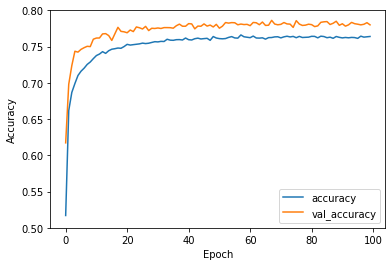

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.8])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

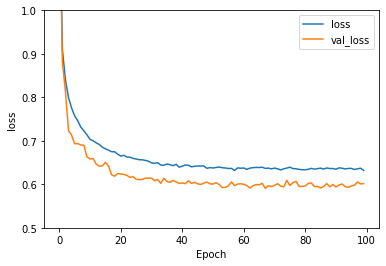

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)